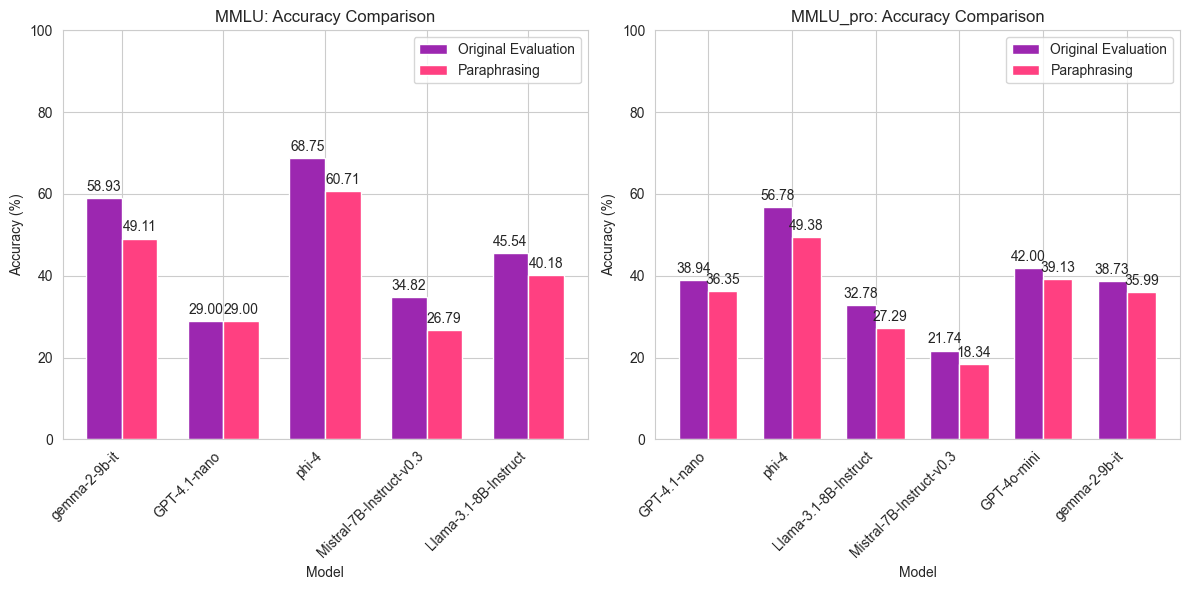

Comparison for MMLU:
                      Model  Accuracy (%)_original  Accuracy (%)_paraphrasing  \
0             gemma-2-9b-it              58.928571                  49.107143   
1              GPT-4.1-nano              29.000000                  29.000000   
2                     phi-4              68.750000                  60.714286   
3  Mistral-7B-Instruct-v0.3              34.821429                  26.785714   
4     Llama-3.1-8B-Instruct              45.535714                  40.178571   

   Difference  
0    9.821429  
1    0.000000  
2    8.035714  
3    8.035714  
4    5.357143  

Comparison for MMLU_pro:
                      Model  Accuracy (%)_original  Accuracy (%)_paraphrasing  \
0              GPT-4.1-nano              38.935713                  36.349364   
1                     phi-4              56.775740                  49.380268   
2     Llama-3.1-8B-Instruct              32.779706                  27.293009   
3  Mistral-7B-Instruct-v0.3              21.74

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


# Función para extraer el nombre del modelo del nombre del archivo
def extract_model_name(filename):
    parts = filename.split('_')
    for part in parts:
        if part.startswith('Llama') or part.startswith('Yi') or part.startswith('gemma') or part.startswith('Mistral') or part.startswith('GPT') or part.startswith('phi'):
            return part
    return 'Unknown'

# Función para leer los archivos Excel y extraer las estadísticas de evaluación
def read_eval_stats(folder):
    eval_stats = []
    for filename in os.listdir(folder):
        # Ignorar los archivos que terminan en '_copia.xlsx'
        if filename.endswith('.xlsx') and not filename.endswith('_copia.xlsx'):
            filepath = os.path.join(folder, filename)
            model_name = extract_model_name(filename)
            df = pd.read_excel(filepath, sheet_name='eval_stats')
            df['Model'] = model_name
            eval_stats.append(df)
    return pd.concat(eval_stats, ignore_index=True)

# Leer los archivos Excel de las carpetas MMLU y MMLU_pro
mmlu_eval_stats = read_eval_stats('MMLU_machine_learning')
mmlu_pro_eval_stats = read_eval_stats('MMLU_pro')

# Filtrar los datos para las iteraciones en_l0_eval y en_l1_eval
mmlu_en_l0_eval = mmlu_eval_stats[mmlu_eval_stats['Experiment'] == 'en_l0_eval']
mmlu_en_l1_eval = mmlu_eval_stats[mmlu_eval_stats['Experiment'] == 'en_l1_eval']
mmlu_pro_en_l0_eval = mmlu_pro_eval_stats[mmlu_pro_eval_stats['Experiment'] == 'en_l0_eval']
mmlu_pro_en_l1_eval = mmlu_pro_eval_stats[mmlu_pro_eval_stats['Experiment'] == 'en_l1_eval']

# Crear colormap metálico
colors = ["#9C27B0", "#FF4081"]  # Morado metálico para Original Evaluation, Rosa metálico para Paraphrasing

# Crear gráficos para comparar la precisión de las iteraciones 1 y 2 para MMLU
plt.figure(figsize=(12, 6))

# Gráfico de barras para en_l0_eval y en_l1_eval en MMLU
plt.subplot(1, 2, 1)
models = mmlu_en_l0_eval['Model'].unique()
accuracy_en_l0 = mmlu_en_l0_eval.groupby('Model')['Accuracy (%)'].mean()
accuracy_en_l1 = mmlu_en_l1_eval.groupby('Model')['Accuracy (%)'].mean()

bar_width = 0.35
index = np.arange(len(models))

# Aplicar colores a las barras
bars1 = plt.bar(index, [accuracy_en_l0.get(model, 0) for model in models], bar_width, label='Original Evaluation', color=colors[0])
bars2 = plt.bar(index + bar_width, [accuracy_en_l1.get(model, 0) for model in models], bar_width, label='Paraphrasing', color=colors[1])

# Añadir etiquetas encima de las barras
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('MMLU: Accuracy Comparison')
plt.xticks(index + bar_width / 2, models, rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()

# Crear gráficos para comparar la precisión de las iteraciones 1 y 2 para MMLU_pro
plt.subplot(1, 2, 2)
models_pro = mmlu_pro_en_l0_eval['Model'].unique()
accuracy_en_l0_pro = mmlu_pro_en_l0_eval.groupby('Model')['Accuracy (%)'].mean()
accuracy_en_l1_pro = mmlu_pro_en_l1_eval.groupby('Model')['Accuracy (%)'].mean()

index_pro = np.arange(len(models_pro))

# Aplicar colores a las barras
bars1_pro = plt.bar(index_pro, [accuracy_en_l0_pro.get(model, 0) for model in models_pro], bar_width, label='Original Evaluation', color=colors[0])
bars2_pro = plt.bar(index_pro + bar_width, [accuracy_en_l1_pro.get(model, 0) for model in models_pro], bar_width, label='Paraphrasing', color=colors[1])

# Añadir etiquetas encima de las barras
for bar in bars1_pro:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')
for bar in bars2_pro:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('MMLU_pro: Accuracy Comparison')
plt.xticks(index_pro + bar_width / 2, models_pro, rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()

# Comparar la precisión de las iteraciones 1 y 2 para MMLU
comparison_mmlu = pd.merge(mmlu_en_l0_eval[['Model', 'Accuracy (%)']], mmlu_en_l1_eval[['Model', 'Accuracy (%)']], on='Model', suffixes=('_original', '_paraphrasing'))
comparison_mmlu['Difference'] = comparison_mmlu['Accuracy (%)_original'] - comparison_mmlu['Accuracy (%)_paraphrasing']

# Comparar la precisión de las iteraciones 1 y 2 para MMLU_pro
comparison_mmlu_pro = pd.merge(mmlu_pro_en_l0_eval[['Model', 'Accuracy (%)']], mmlu_pro_en_l1_eval[['Model', 'Accuracy (%)']], on='Model', suffixes=('_original', '_paraphrasing'))
comparison_mmlu_pro['Difference'] = comparison_mmlu_pro['Accuracy (%)_original'] - comparison_mmlu_pro['Accuracy (%)_paraphrasing']

# Mostrar las tablas de comparación
print("Comparison for MMLU:")
print(comparison_mmlu)
print("\nComparison for MMLU_pro:")
print(comparison_mmlu_pro)

latex_table = comparison_mmlu_pro.to_latex(index=False)
print(latex_table)

# MIRAR SI LAS PREGUNTAS QUE FALLAN LOS MODELOS SON LAS MISMAS Y SE REPITEN O SI CAMBIAN DE UNO A OTRO


In [6]:
# SACAR EXCEL DE ACCURACY RELATIVA
import os
import pandas as pd

# Función para extraer el nombre del modelo del nombre del archivo
def extract_model_name(filename):
    parts = filename.split('_')
    for part in parts:
        if part.startswith('Llama') or part.startswith('Yi') or part.startswith('gemma') or part.startswith('Mistral') or part.startswith('GPT') or part.startswith('phi'):
            return part
    return 'Unknown'

def calculate_relative_accuracy(df, penalty):
    total_questions = len(df)
    df['Score'] = df.apply(lambda row: 1 if row['correct_answer'] == row['llm_answer_filtered'] else -penalty, axis=1)
    total_score = df['Score'].sum()
    normalized_score = total_score / total_questions
    return total_score, normalized_score

def process_accuracy(folder, output_path):
    models = []
    scores_en_l0 = []
    normalized_scores_en_l0 = []
    scores_en_l1 = []
    normalized_scores_en_l1 = []
    
    for filename in os.listdir(folder):
        if filename.startswith('paraphrases_') and filename.endswith('.xlsx'):
            filepath = os.path.join(folder, filename)
            model_name = extract_model_name(filename)
            models.append(model_name)
            
            df_en_l0 = pd.read_excel(filepath, sheet_name='en_l0', engine='openpyxl')
            df_en_l1 = pd.read_excel(filepath, sheet_name='en_l1', engine='openpyxl')
            
            if 'MMLU_machine_learning' in folder:
                penalty = 1/3
            else:
                penalty = 1/9
            
            score_en_l0, normalized_score_en_l0 = calculate_relative_accuracy(df_en_l0, penalty)
            score_en_l1, normalized_score_en_l1 = calculate_relative_accuracy(df_en_l1, penalty)
            
            scores_en_l0.append(score_en_l0)
            normalized_scores_en_l0.append(normalized_score_en_l0)
            scores_en_l1.append(score_en_l1)
            normalized_scores_en_l1.append(normalized_score_en_l1)
    
    result_df = pd.DataFrame({
        'Model': models,
        'Score_en_l0': scores_en_l0,
        'Normalized_Score_en_l0': normalized_scores_en_l0,
        'Score_en_l1': scores_en_l1,
        'Normalized_Score_en_l1': normalized_scores_en_l1
    })
    
    return result_df

# Procesar los archivos de MMLU y MMLU_pro
folder_mmlu = 'MMLU_machine_learning'
folder_mmlu_pro = 'MMLU_pro'
output_path = 'RELATIVE_ACCURACY_machine_learning.xlsx'

result_mmlu = process_accuracy(folder_mmlu, output_path)
result_mmlu_pro = process_accuracy(folder_mmlu_pro, output_path)

# Guardar los resultados en un archivo Excel
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    result_mmlu.to_excel(writer, sheet_name='MMLU', index=False)
    result_mmlu_pro.to_excel(writer, sheet_name='MMLU_pro', index=False)

print("Archivo RELATIVE_ACCURACY.xlsx generado con éxito.")

Archivo RELATIVE_ACCURACY.xlsx generado con éxito.


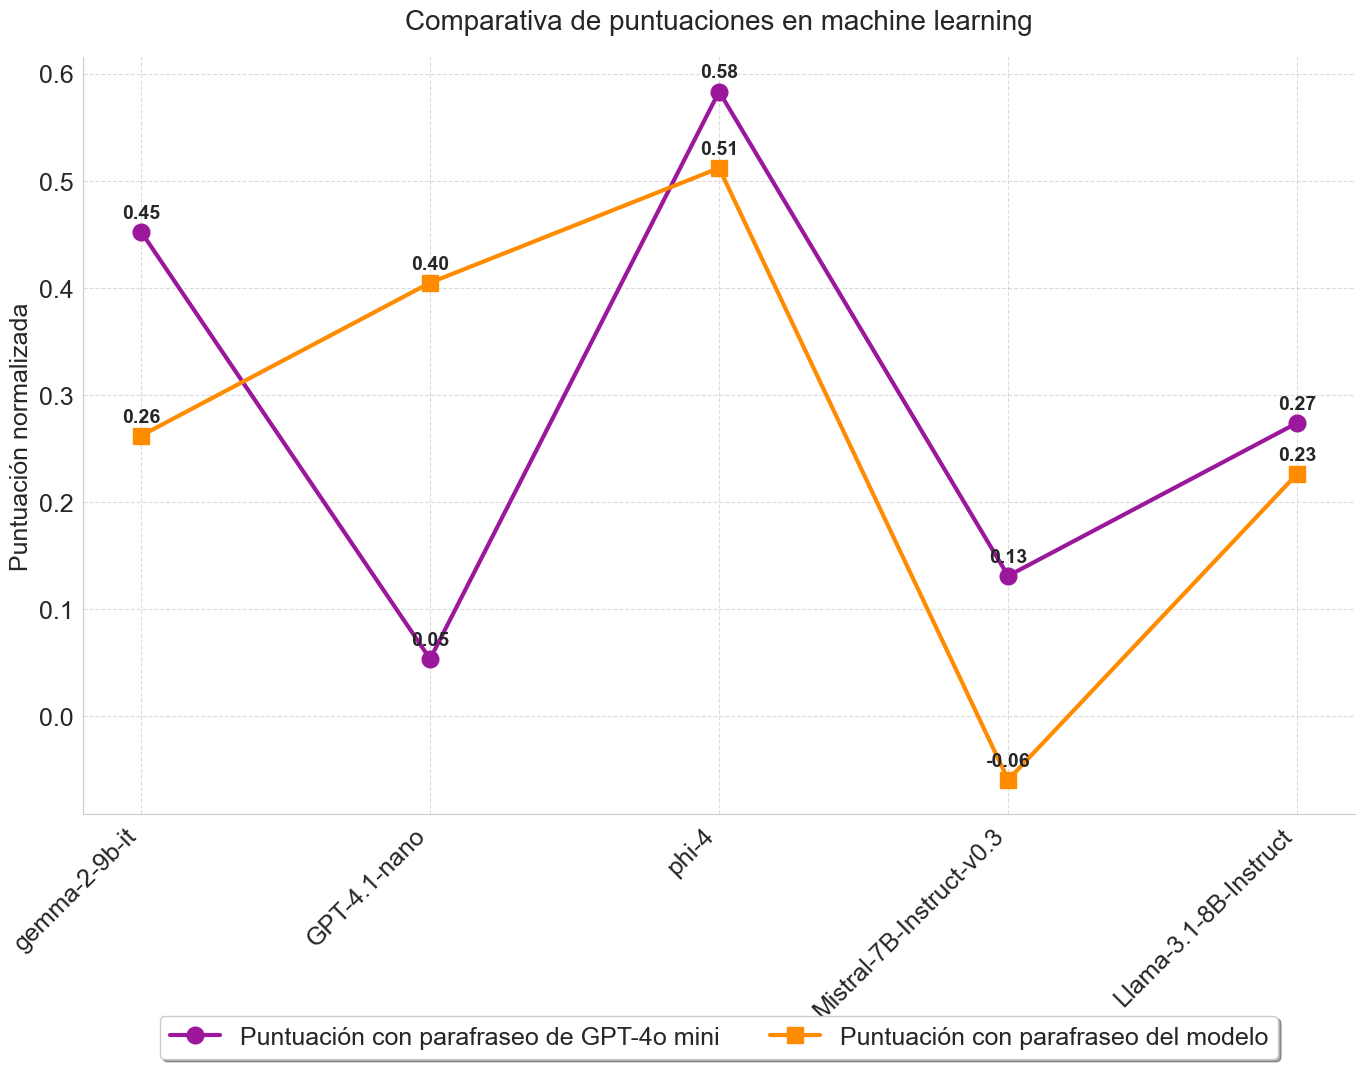

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuración del estilo
plt.style.use('default')
sns.set_style("whitegrid")

# Leer los archivos Excel
df_model_scores = pd.read_excel('RELATIVE_ACCURACY_machine_learning.xlsx', sheet_name='MMLU', engine='openpyxl')
df_gpt_paraphrasing = pd.read_excel('CATEGORIES_ACCURACY_UPDATED.xlsx', sheet_name='MMLU', engine='openpyxl')

# Obtener modelos que están en el primer Excel
models = df_model_scores['Model'].tolist()

# Extraer los datos para la primera línea - puntuación con parafraseo del modelo USANDO en_l0
model_scores = df_model_scores['Normalized_Score_en_l0'].tolist()

# Filtrar la fila correspondiente a machine_learning_test
machine_learning_row = df_gpt_paraphrasing[df_gpt_paraphrasing['CATEGORY'] == 'machine_learning_test']

# Extraer las columnas con el formato correcto para los datos de GPT
normalized_cols = [col for col in machine_learning_row.columns if "_NORMALIZED_enl1" in col]

# Crear mapeo entre modelos y columnas
mapeo_manual = {}
for model in models:
    for col in normalized_cols:
        if model in col:
            mapeo_manual[model] = col
            break

# Extraer los valores usando el mapeo
gpt_scores = []
valid_models = []

for model in models:
    if model in mapeo_manual:
        try:
            score = machine_learning_row[mapeo_manual[model]].values[0]
            gpt_scores.append(score)
            valid_models.append(model)
        except:
            pass

# Filtrar los datos para modelos válidos
model_scores_filtered = [df_model_scores[df_model_scores['Model'] == model]['Normalized_Score_en_l0'].values[0] 
                        for model in valid_models]

# Crear la figura y ajustar el tamaño
fig, ax = plt.subplots(figsize=(14, 10))  # Aumentado altura para dar más espacio a la leyenda

# Colores elegantes
color_model = '#9b179b'  # Magenta
color_gpt = '#FF8C00'    # Naranja

# Crear las líneas
ax.plot(range(len(valid_models)), model_scores_filtered, marker='o', markersize=12,
        linewidth=3.0, color=color_model, label='Puntuación con parafraseo de GPT-4o mini')
ax.plot(range(len(valid_models)), gpt_scores, marker='s', markersize=12,
        linewidth=3.0, color=color_gpt, label='Puntuación con parafraseo del modelo')

# Añadir etiquetas a cada punto con tamaño de fuente aumentado
for i, (score1, score2) in enumerate(zip(model_scores_filtered, gpt_scores)):
    ax.annotate(f'{score1:.2f}', (i, score1), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=14, fontweight='bold')
    ax.annotate(f'{score2:.2f}', (i, score2), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=14, fontweight='bold')

# Personalizar el gráfico con tamaños de fuente aumentados
ax.set_xticks(range(len(valid_models)))
ax.set_xticklabels(valid_models, rotation=45, ha='right', fontsize=16)
ax.set_ylabel('Puntuación normalizada', fontsize=18)
ax.set_title('Comparativa de puntuaciones en machine learning', 
             fontsize=20, pad=20)

# Aumentar tamaño de los números en los ejes
ax.tick_params(axis='both', which='major', labelsize=18)

# Añadir leyenda debajo del gráfico con tamaño de fuente aumentado
# Colocando la leyenda mucho más abajo para que no se solape con los nombres de los ejes X
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), frameon=True, 
          fancybox=True, shadow=True, ncol=2, fontsize=18)

# Añadir grid y mejorar apariencia
ax.grid(True, linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar los márgenes para dar suficiente espacio a la leyenda debajo
plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  # Incrementado el espacio inferior para la leyenda

# Mostrar la figura
plt.show()

# Restaurar la configuración para no afectar a otras gráficas
plt.rcParams.update({'font.weight': 'normal'})